In [15]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/4c/43/2fc7f76c8891aef148901f1ba3dee65c1cbac00a85ae5ee0dabc2b861256/mlxtend-0.23.4-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.3.1 from https://files.pythonhosted.org/packages/8d/a1/d3a7628630a711e2ac0d1a482910da174b629f44e7dd8cfcd6924a4ef81a/scikit_learn-1.7.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 722.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 1.2 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl

In [16]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import fpgrowth

In [ ]:
import pandas as pd

excel_file = pd.ExcelFile('online_retail_II.xlsx')

sheet_names = excel_file.sheet_names

print(sheet_names)

['Year 2009-2010', 'Year 2010-2011']


In [ ]:
dfs = {}

for idx, sheet_name in enumerate(sheet_names):
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    dfs[f'df{idx+1}'] = df


for name, df in dfs.items():
    print(f"{name}: shape = {df.shape}")

df1: shape = (525461, 8)
df2: shape = (541910, 8)


In [7]:
df1 = dfs['df1']
df2 = dfs['df2']

In [8]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
df2.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [12]:
print(df1.info())
print(df1.describe(include='all'))
print(df1['Country'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None
         Invoice StockCode                         Description       Quantity  \
count   525461.0    525461                              522533  525461.000000   
unique   28816.0      4632                                4681            NaN   
top     537434.0    85123A  WHITE HANGING HEART T-LIGHT HOLD

/var/folders/hs/bg0sjys12tqgftpwb7z0s8j00000gn/T/ipykernel_48729/2099744852.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df1.describe(include='all'))


In [13]:
df_clean = df1.dropna(subset=['Description'])
df_clean = df_clean[df_clean['Quantity'] > 0]
df_uk = df_clean[df_clean['Country'] == 'United Kingdom']

In [ ]:
basket = (
    df_uk.groupby(['Invoice', 'Description'])['Quantity']
    .sum().unstack().fillna(0)
)

def encode_units(x):
    return 1 if x > 0 else 0

basket_sets = basket.applymap(encode_units)

In [17]:
frequent_itemsets = fpgrowth(basket_sets, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

print(frequent_itemsets.head(10))

/Users/yashrajsingh/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support                              itemsets
39   0.165702  (WHITE HANGING HEART T-LIGHT HOLDER)
537  0.095130            (REGENCY CAKESTAND 3 TIER)
0    0.079775      (STRAWBERRY CERAMIC TRINKET BOX)
7    0.069124       (ASSORTED COLOUR BIRD ORNAMENT)
8    0.066849            (HOME BUILDING BLOCK WORD)
78   0.064161    (PACK OF 72 RETRO SPOT CAKE CASES)
72   0.062868         (60 TEATIME FAIRY CAKE CASES)
605  0.060749             (JUMBO BAG RED RETROSPOT)
124  0.058525              (JUMBO STORAGE BAG SUKI)
79   0.057285         (WOODEN FRAME ANTIQUE WHITE )


In [18]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

                           antecedents                        consequents  \
991       (CHILDS GARDEN TROWEL BLUE )        (CHILDS GARDEN TROWEL PINK)   
990        (CHILDS GARDEN TROWEL PINK)       (CHILDS GARDEN TROWEL BLUE )   
812    (POPPY'S PLAYHOUSE LIVINGROOM )       (POPPY'S PLAYHOUSE BEDROOM )   
813       (POPPY'S PLAYHOUSE BEDROOM )    (POPPY'S PLAYHOUSE LIVINGROOM )   
673    (POPPY'S PLAYHOUSE LIVINGROOM )        (POPPY'S PLAYHOUSE KITCHEN)   
672        (POPPY'S PLAYHOUSE KITCHEN)    (POPPY'S PLAYHOUSE LIVINGROOM )   
395       (POPPY'S PLAYHOUSE BEDROOM )        (POPPY'S PLAYHOUSE KITCHEN)   
394        (POPPY'S PLAYHOUSE KITCHEN)       (POPPY'S PLAYHOUSE BEDROOM )   
804   (PINK REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   
805  (GREEN REGENCY TEACUP AND SAUCER)   (PINK REGENCY TEACUP AND SAUCER)   

      support  confidence       lift  
991  0.010030    0.822034  64.371578  
990  0.010030    0.785425  64.371578  
812  0.010444    0.855932  57.48416

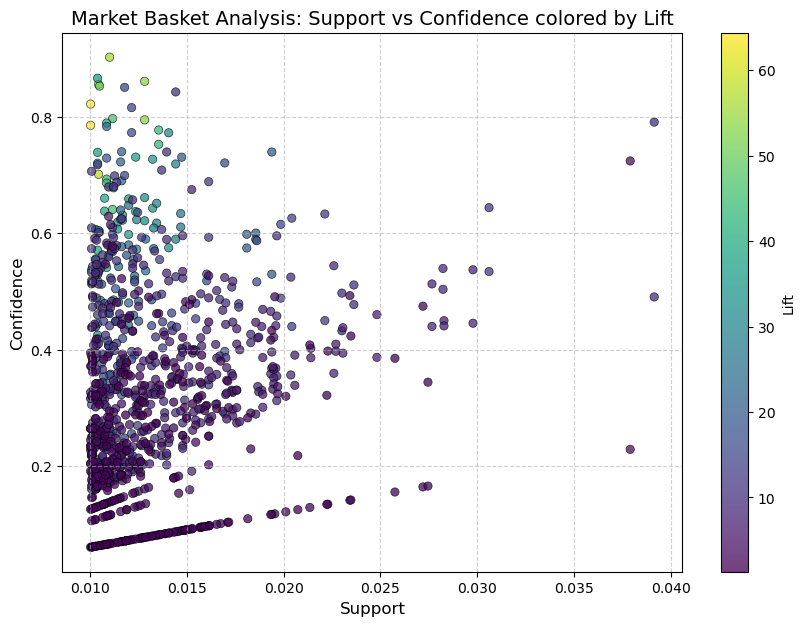

In [22]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(10, 7))
scatter = plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', alpha=0.75, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Lift')
plt.title('Market Basket Analysis: Support vs Confidence colored by Lift', fontsize=14)
plt.xlabel('Support', fontsize=12)
plt.ylabel('Confidence', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


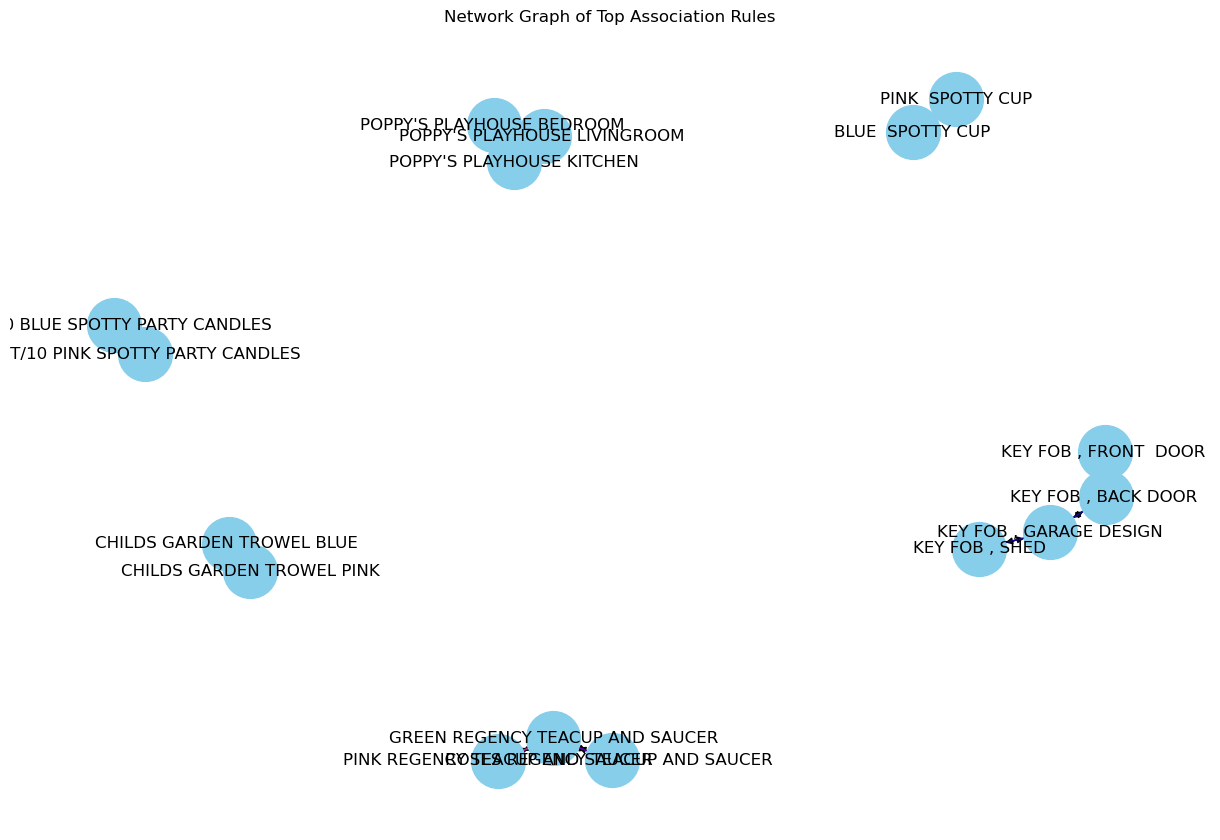

In [20]:
import networkx as nx

top_rules = rules.head(20)
G = nx.DiGraph()

for _, row in top_rules.iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            G.add_edge(a, c, weight=row['lift'])

pos = nx.spring_layout(G, k=1)
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

plt.figure(figsize=(12,8))
nx.draw(G, pos, node_color='skyblue', node_size=1500, with_labels=True, arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=weights, edge_cmap=plt.cm.plasma, arrows=True)
plt.title('Network Graph of Top Association Rules')
plt.show()

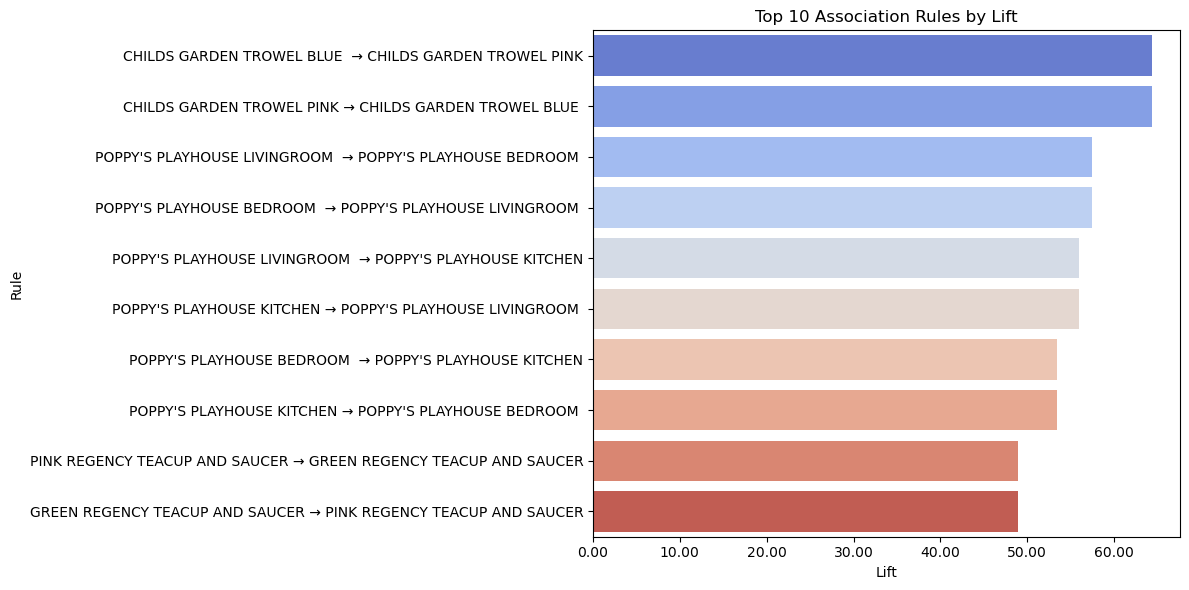

In [23]:
import matplotlib.ticker as mticker

top_lift = rules.sort_values('lift', ascending=False).head(10)
top_lift['rule'] = top_lift['antecedents'].apply(lambda x: ', '.join(list(x))) + ' → ' + top_lift['consequents'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(12, 6))
sns.barplot(x='lift', y='rule', data=top_lift, palette='coolwarm')
plt.xlabel('Lift')
plt.ylabel('Rule')
plt.title('Top 10 Association Rules by Lift')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
plt.tight_layout()
plt.show()


In [ ]:
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])
df_uk['Month'] = df_uk['InvoiceDate'].dt.month

/var/folders/hs/bg0sjys12tqgftpwb7z0s8j00000gn/T/ipykernel_48729/2483053397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])
/var/folders/hs/bg0sjys12tqgftpwb7z0s8j00000gn/T/ipykernel_48729/2483053397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['Month'] = df_uk['InvoiceDate'].dt.month


/var/folders/hs/bg0sjys12tqgftpwb7z0s8j00000gn/T/ipykernel_48729/4178118597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])
/var/folders/hs/bg0sjys12tqgftpwb7z0s8j00000gn/T/ipykernel_48729/4178118597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['MonthYear'] = df_uk['InvoiceDate'].dt.to_period('M')


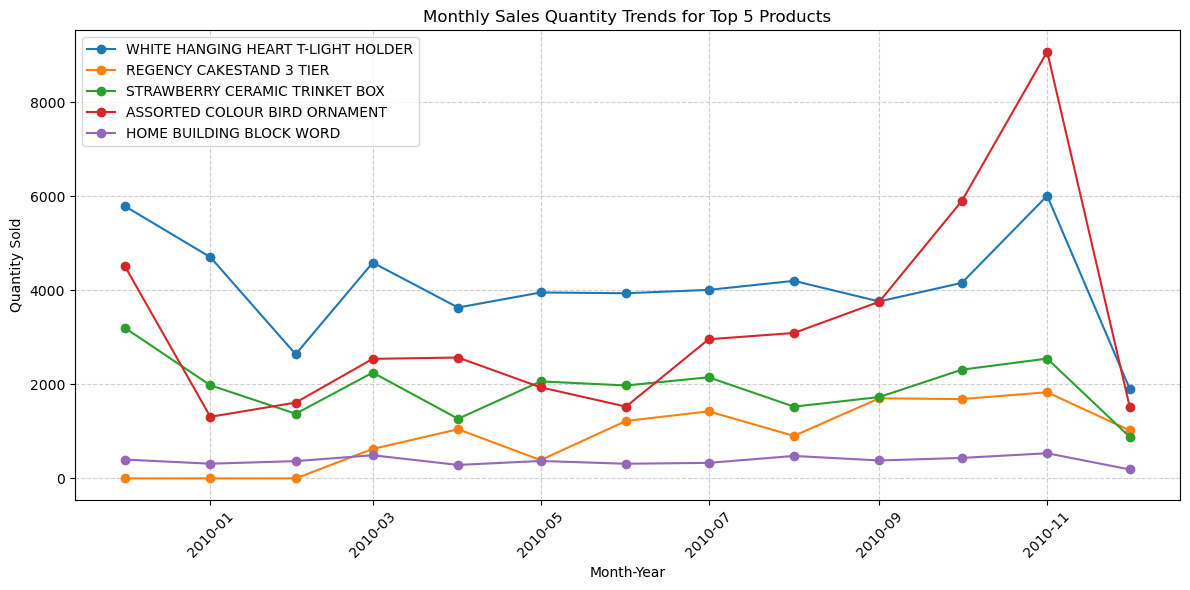

In [ ]:
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])
df_uk['MonthYear'] = df_uk['InvoiceDate'].dt.to_period('M')

top5_products = df_uk['Description'].value_counts().head(5).index.tolist()

monthly_trends = (
    df_uk[df_uk['Description'].isin(top5_products)]
    .groupby(['MonthYear', 'Description'])['Quantity']
    .sum()
    .unstack()
    .fillna(0)
)

plt.figure(figsize=(12, 6))
for product in top5_products:
    plt.plot(monthly_trends.index.to_timestamp(), monthly_trends[product], marker='o', label=product)

plt.title('Monthly Sales Quantity Trends for Top 5 Products')
plt.xlabel('Month-Year')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
